**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Write your code here
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.optimize import minimize

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [3]:
# write you answer here

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [4]:
# write your answer here

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [5]:
# write your answer here

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [6]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [7]:
# begin by setting the seed and drawing from random normal
np.random.seed(1984)
eps = np.random.normal(0,par.sigma,par.K)

# Simulate and calculate expected utility and average realized utility
expected_utility = np.zeros(par.J)
realized_utility = np.zeros(par.J)

for j in range(par.J):
    eps = np.random.normal(0, par.sigma, par.K)
    u_kij = par.v[j] + eps
    expected_utility[j] = np.mean(u_kij)
    realized_utility[j] = np.mean(u_kij)

# Display the results
for j in range(par.J):
    print(f"Career track {j+1}:")
    print(f"  Analytical expected utility: {par.v[j]:.4f}")
    print(f"  Simulated Expected Utility: {expected_utility[j]:.4f}")
    print(f"  Simulated Average Realised Utility: {realized_utility[j]:.4f}")

Career track 1:
  Analytical expected utility: 1.0000
  Simulated Expected Utility: 0.9725
  Simulated Average Realised Utility: 0.9725
Career track 2:
  Analytical expected utility: 2.0000
  Simulated Expected Utility: 2.0109
  Simulated Average Realised Utility: 2.0109
Career track 3:
  Analytical expected utility: 3.0000
  Simulated Expected Utility: 3.0358
  Simulated Average Realised Utility: 3.0358


It's worth noticing that the simulated expected and realized utility for each career path are same, and are close to their respective $ v_{j} $. This makes sense at this is close to the mean $ E[u_{i,j}]$ (called 'Analytic expected utility' above), and the discrepency is due to there being a finite number of draws $K=1000$. Moreover, the simulated expected utility and simulated average realised utility are the same because the calculations are made based on the same draws from the normal distribution (with the same seed). 

To visualize the utility from each career path, we also provide a density plot of the distribution of utilities below. 


/Users/joshuaclyne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/joshuaclyne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/joshuaclyne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


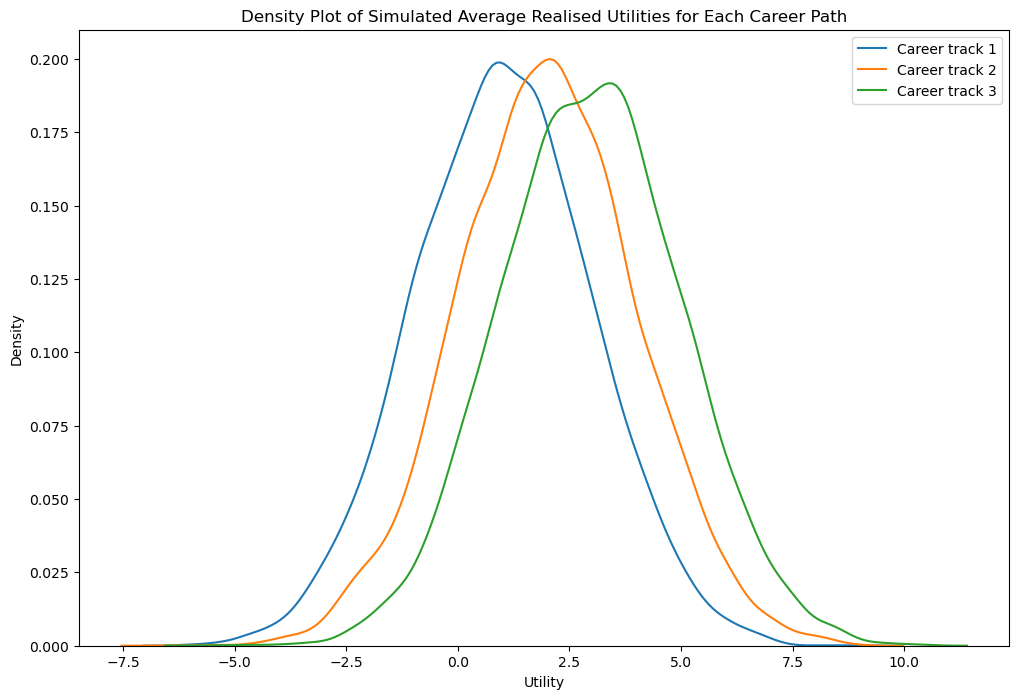

In [8]:
# Plot density plots for each career path
# Simulate utilities
utilities = []

for j in range(par.J):
    eps = np.random.normal(0, par.sigma, par.K)
    u_kij = par.v[j] + eps
    utilities.append(u_kij)

# Plot density plots for each career path
plt.figure(figsize=(12, 8))

for j in range(par.J):
    sns.kdeplot(utilities[j], label=f'Career track {j+1}')

plt.title('Density Plot of Simulated Average Realised Utilities for Each Career Path')
plt.xlabel('Utility')
plt.ylabel('Density')
plt.legend()
plt.show()

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

|   Graduate |   Share in |   Share in |   Share in |   Avg Subj |   Avg Real |
|            |   Career 1 |   Career 2 |   Career 3 |       Util |       Util |
|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|
|          1 |      0.154 |      0.305 |      0.54  |      3.914 |      2.387 |
|          2 |      0.102 |      0.272 |      0.626 |      3.489 |      2.524 |
|          3 |      0.071 |      0.246 |      0.682 |      3.313 |      2.609 |
|          4 |      0.045 |      0.228 |      0.726 |      3.224 |      2.663 |
|          5 |      0.032 |      0.209 |      0.759 |      3.176 |      2.739 |
|          6 |      0.024 |      0.186 |      0.79  |      3.142 |      2.778 |
|          7 |      0.02  |      0.168 |      0.813 |      3.098 |      2.785 |
|          8 |      0.012 |      0.151 |      0.837 |      3.084 |      2.821 |
|          9 |      0.01  |      0.144 |      0.847 |      3.072 |      2.837 |
|         10 |      0.007 |      0.132 |

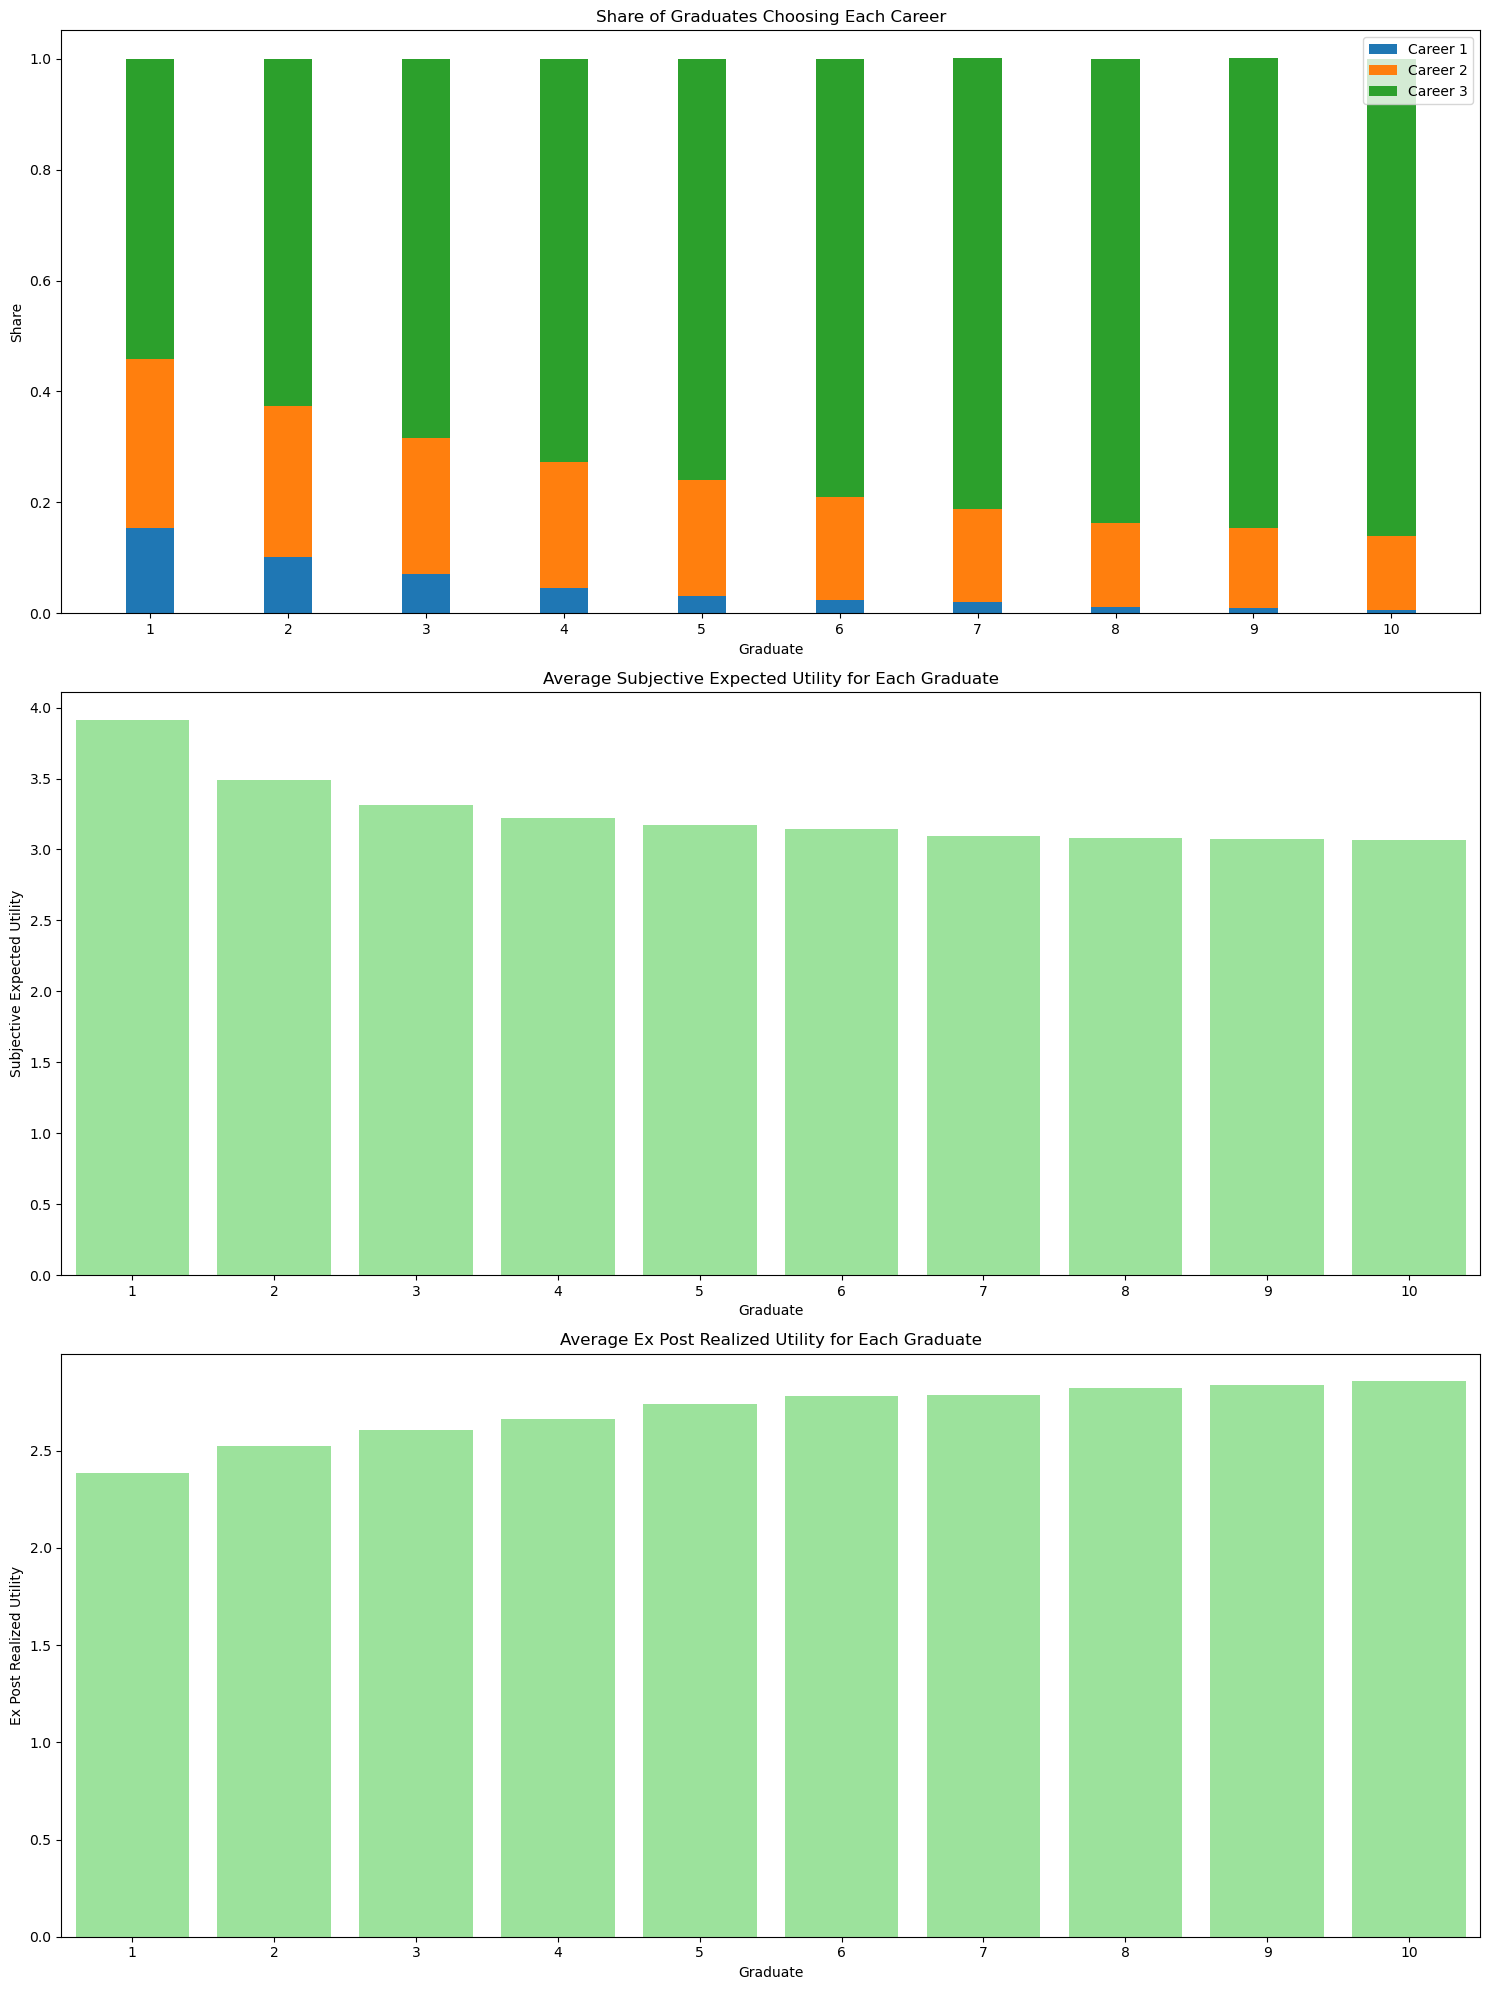

In [9]:
# Initialize arrays to store results
chosen_careers = np.zeros((par.N, par.K), dtype=int)
prior_expectations = np.zeros((par.N, par.K))
realized_utilities = np.zeros((par.N, par.K))

# Simulate career choice based on friends' information
for i in range(par.N):
    Fi = i + 1  # Number of friends increases with each graduate
    
    for k in range(par.K):
        prior_utility = np.zeros(par.J)
        own_noise = np.random.normal(0, par.sigma, par.J)
        
        for j in range(par.J):
            friends_noise = np.random.normal(0, par.sigma, Fi)
            #print(f'par.v[j]: {par.v[j]}')
            prior_utility[j] = np.mean(par.v[j] + friends_noise)
        
        # Choose the career track with the highest prior expected utility
        chosen_career = np.argmax(prior_utility)
        
        # Store the results
        chosen_careers[i, k] = chosen_career
        prior_expectations[i, k] = prior_utility[chosen_career]
        realized_utilities[i, k] = par.v[chosen_career] + own_noise[chosen_career]

# Calculate the required statistics for each graduate
share_of_graduates_choosing_career = np.zeros((par.N, par.J))
average_subjective_expected_utility = np.zeros(par.N)
average_ex_post_realized_utility = np.zeros(par.N)

for i in range(par.N):
    for j in range(par.J):
        share_of_graduates_choosing_career[i, j] = np.mean(chosen_careers[i, :] == j)
    average_subjective_expected_utility[i] = np.mean(prior_expectations[i, :])
    average_ex_post_realized_utility[i] = np.mean(realized_utilities[i, :])

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame({
    'Graduate': np.arange(1, par.N + 1),
    'Share in\nCareer 1': share_of_graduates_choosing_career[:, 0],
    'Share in\nCareer 2': share_of_graduates_choosing_career[:, 1],
    'Share in\nCareer 3': share_of_graduates_choosing_career[:, 2],
    'Avg Subj\nUtil': average_subjective_expected_utility,
    'Avg Real\nUtil': average_ex_post_realized_utility
})

# Set 'Graduate' as the index
results_df.set_index('Graduate', inplace=True)

# Format the results to reduce decimal places
results_df = results_df.round(3)

# Display the results in a Markdown table
markdown_table = results_df.to_markdown()
print(markdown_table)

# Visualize the results
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

# Plot the share of graduates choosing each career as a stacked bar chart
width = 0.35
labels = np.arange(1, par.N + 1)
bars1 = results_df['Share in\nCareer 1']
bars2 = results_df['Share in\nCareer 2']
bars3 = results_df['Share in\nCareer 3']

axes[0].bar(labels, bars1, width, label='Career 1')
axes[0].bar(labels, bars2, width, bottom=bars1, label='Career 2')
axes[0].bar(labels, bars3, width, bottom=bars1 + bars2, label='Career 3')
axes[0].set_xlabel('Graduate')
axes[0].set_ylabel('Share')
axes[0].set_title('Share of Graduates Choosing Each Career')
axes[0].legend()
axes[0].set_xticks(labels)  # Ensure all graduate numbers are shown

# Plot the average subjective expected utility for each graduate (single color)
sns.barplot(ax=axes[1], x=np.arange(1, par.N + 1), y=average_subjective_expected_utility, color='lightgreen')
axes[1].set_title('Average Subjective Expected Utility for Each Graduate')
axes[1].set_xlabel('Graduate')
axes[1].set_ylabel('Subjective Expected Utility')

# Plot the average ex post realized utility for each graduate (single color)
sns.barplot(ax=axes[2], x=np.arange(1, par.N + 1), y=average_ex_post_realized_utility, color='lightgreen')
axes[2].set_title('Average Ex Post Realized Utility for Each Graduate')
axes[2].set_xlabel('Graduate')
axes[2].set_ylabel('Ex Post Realized Utility')

plt.tight_layout()
plt.show()


#### Key Findings

1. **Share of Graduates Choosing Each Career**
   - The share of graduates choosing each career is represented in the first bar chart. Each bar shows the proportion of graduates (from 1 to 10) who chose Career 1, Career 2, and Career 3.
   - As the number of friends increases, the share of graduates choosing Career 3 also increases. This suggests that with more information (from more friends), graduates are more likely to choose the career with the highest true value (Career 3).

2. **Average Subjective Expected Utility**
   - The second bar chart displays the average subjective expected utility for each graduate, which represents their expected utility based on friends' information.
   - Graduates with fewer friends (e.g., Graduate 1) tend to have higher subjective expected utility. This is because their prior information is less precise, leading to potentially higher subjective expectations.

3. **Average Ex Post Realized Utility**
   - The third bar chart shows the average ex post realized utility for each graduate after choosing their career based on the initial information.
   - The realized utility tends to increase with the number of friends. Graduates with more friends have better information, leading to more accurate career choices and higher realized utility.


After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

|   Graduate |   Avg Subj Util New |   Avg Real Util New |   Switch Share if initial Career 1 |   Switch Share if initial Career 2 |   Switch Share if initial Career 3 |
|-----------:|--------------------:|--------------------:|-----------------------------------:|-----------------------------------:|-----------------------------------:|
|          1 |               2.673 |               2.166 |                              0.876 |                              0.716 |                              0.417 |
|          2 |               2.572 |               2.29  |                              0.878 |                              0.714 |                              0.4   |
|          3 |               2.507 |               2.301 |                              0.883 |                              0.73  |                              0.392 |
|          4 |               2.485 |               2.311 |                              0.882 |                              0.718 |                  

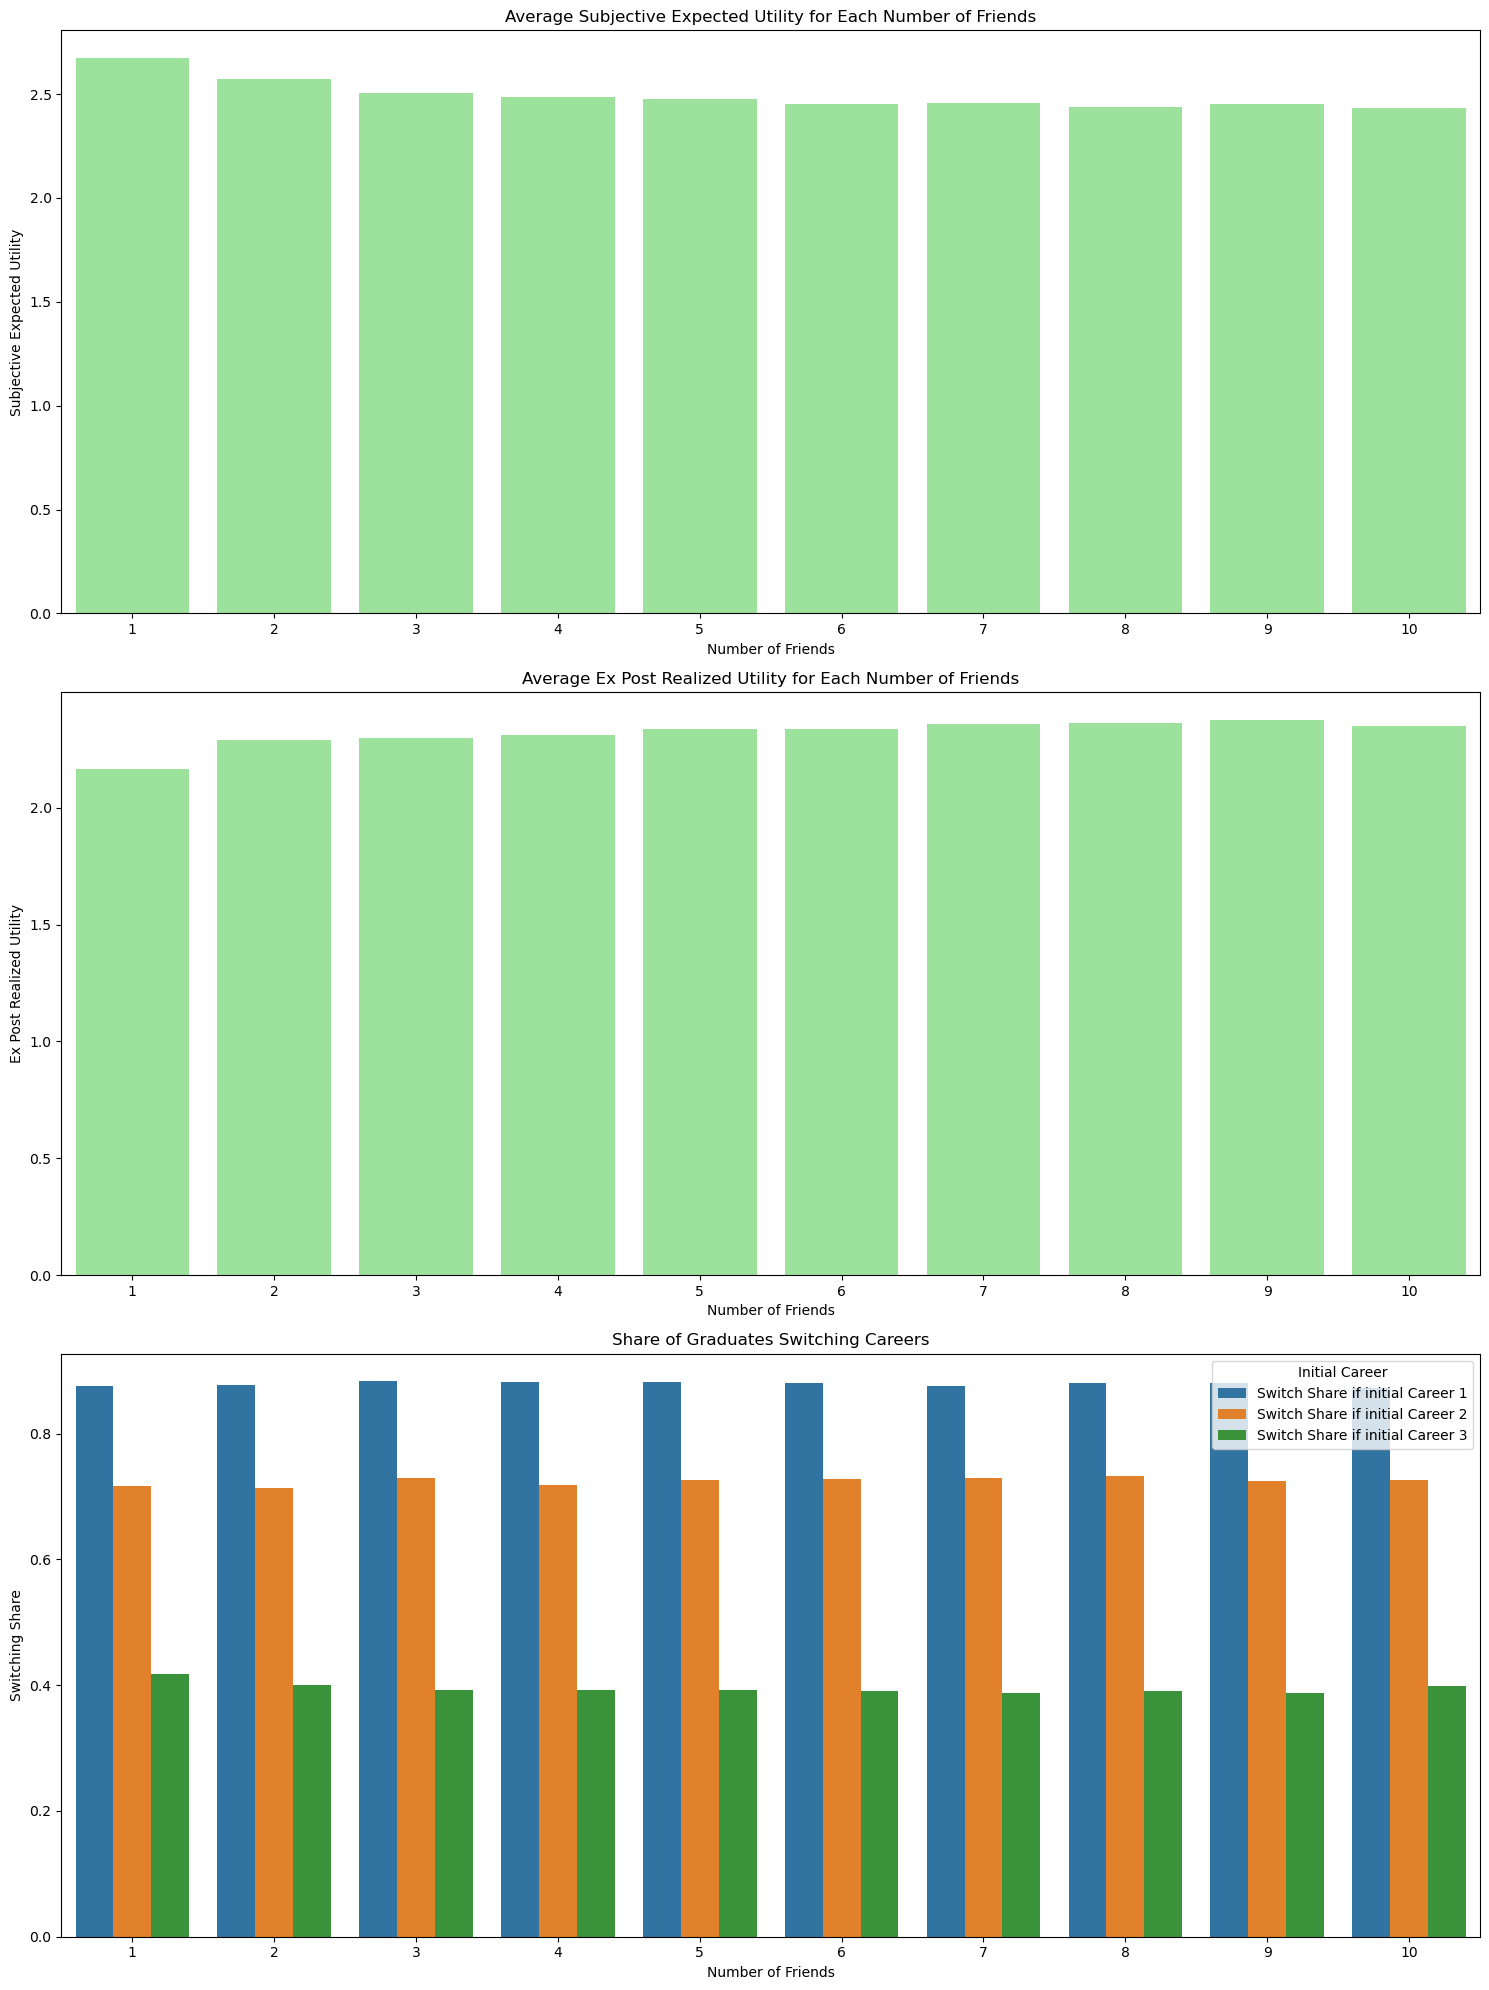

In [10]:

# Initialize arrays for storing results
results = {
    'Graduate': [],
    'Avg Subj Util New': [],
    'Avg Real Util New': [],
    'Switch Share if initial Career 1': [],
    'Switch Share if initial Career 2': [],
    'Switch Share if initial Career 3': []
}

# Simulate behavior for each initial career and number of friends
for num_friends in range(1, par.N + 1):
    new_prior_expectations = np.zeros((par.J, par.K))
    new_realized_utilities = np.zeros((par.J, par.K))
    switches = np.zeros((par.J, par.K), dtype=bool)

    # Perform K simulations for each initial career and number of friends
    for initial_career in range(par.J):
        for k in range(par.K):
            new_priors = np.zeros(par.J)
            new_realized = np.zeros(par.J)

            for j in range(par.J):
                current_utility = par.v[j] + np.random.normal(0, par.sigma)
                friends_noise = np.random.normal(0, par.sigma, num_friends)
                friends_average_utility_cost = np.mean(par.v[j] + friends_noise) - par.c

                if current_utility >= friends_average_utility_cost:
                    new_priors[j] = current_utility
                    new_realized[j] = current_utility
                else:
                    new_priors[j] = friends_average_utility_cost
                    new_realized[j] = par.v[j] + np.random.normal(0, par.sigma) - par.c

            new_chosen_career = np.argmax(new_priors)

            new_prior_expectations[initial_career, k] = new_priors[initial_career]
            new_realized_utilities[initial_career, k] = new_realized[initial_career]
            switches[initial_career, k] = (new_chosen_career != initial_career)

    # Calculate the statistics for each combination of initial career and number of friends
    avg_subj_util_new = np.mean(new_prior_expectations, axis=1)
    avg_real_util_new = np.mean(new_realized_utilities, axis=1)
    switch_share = np.mean(switches, axis=1)

    # Store the results
    results['Graduate'].append(num_friends)
    results['Avg Subj Util New'].append(avg_subj_util_new.mean())
    results['Avg Real Util New'].append(avg_real_util_new.mean())
    results['Switch Share if initial Career 1'].append(switch_share[0])
    results['Switch Share if initial Career 2'].append(switch_share[1])
    results['Switch Share if initial Career 3'].append(switch_share[2])

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Format the results to reduce decimal places
results_df = results_df.round(3)

# Display the results in a Markdown table with wrapped labels
markdown_table_new = results_df.to_markdown(index=False)
print(markdown_table_new)

# Visualize the results
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

# Plot the average subjective expected utility for each combination of initial career and number of friends
sns.barplot(ax=axes[0], data=results_df, x='Graduate', y='Avg Subj Util New', color='lightgreen')
axes[0].set_title('Average Subjective Expected Utility for Each Number of Friends')
axes[0].set_xlabel('Number of Friends')
axes[0].set_ylabel('Subjective Expected Utility')

# Plot the average ex post realized utility for each combination of initial career and number of friends
sns.barplot(ax=axes[1], data=results_df, x='Graduate', y='Avg Real Util New', color='lightgreen')
axes[1].set_title('Average Ex Post Realized Utility for Each Number of Friends')
axes[1].set_xlabel('Number of Friends')
axes[1].set_ylabel('Ex Post Realized Utility')

# Plot the share of graduates switching careers from each initial choice
switching_shares_df = results_df.melt(id_vars=['Graduate'], value_vars=[
    'Switch Share if initial Career 1', 
    'Switch Share if initial Career 2', 
    'Switch Share if initial Career 3'], 
    var_name='Initial Career', value_name='Switch Share')
sns.barplot(ax=axes[2], data=switching_shares_df, x='Graduate', y='Switch Share', hue='Initial Career')
axes[2].set_title('Share of Graduates Switching Careers')
axes[2].set_xlabel('Number of Friends')
axes[2].set_ylabel('Switching Share')
axes[2].legend(title='Initial Career')

plt.tight_layout()
plt.show()

#### Key Findings

1. **Average Subjective Expected Utility (New)**
   - The first bar chart shows the average subjective expected utility for each graduate after potentially switching careers.
   - Graduates with fewer friends (e.g., Graduate 1) tend to have slightly higher subjective expected utility compared to those with more friends. This is because graduates with fewer friends rely on less precise initial information, leading to potentially larger revisions in their expectations after learning their true utility.

2. **Average Ex Post Realized Utility (New)**
   - The second bar chart displays the average ex post realized utility for each graduate after potentially switching careers.
   - The realized utility is relatively stable across graduates with different numbers of friends, but it is slightly higher for graduates with fewer friends initially. This indicates that while these graduates adjust their career choice based on the true utility they learn, the switching cost impacts their final realized utility less significantly.

3. **Share of Graduates Switching Careers (New)**
   - The third bar chart indicates the share of graduates who switch careers after the first year, conditional on their initial career choice.
   - Unlike previous results, the share of graduates switching careers remains relatively constant across different levels of friends. This suggests that the number of friends does not significantly impact the likelihood of switching careers once the true utility is known.
   - The switching shares are displayed for each initial career choice, with different colors representing switching from Career 1, Career 2, and Career 3 respectively. Graduates initially in Career 1 (the lowest paying career) have the highest switching share, followed by those in Career 2. Graduates initially in Career 3 (the highest paying career) have the lowest switching share, as expected.


#### Approach

To determine the switching behavior and resulting utilities, the following steps were implemented:

1. **Simulate Behavior for Each Initial Career and Number of Friends**
   - For each graduate, simulate the career choice process based on the information from their friends.
   - Calculate the current utility for each career considering the graduate's own noise and the average utility from friends minus the switching cost.

2. **Calculate New Priors and Realized Utilities**
   - Compare the current utility to the friends' average utility cost.
   - If the current utility is higher than the friends' average utility cost, the new prior and realized utilities are set to the current utility. Otherwise, the new prior is set to the friends' average utility cost, and the realized utility is recalculated considering the switching cost.

3. **Determine Optimal Career Choices and Switching Behavior**
   - For each simulation, determine the new chosen career based on the highest new prior utility.
   - Record whether the graduate switches careers and calculate the average subjective expected utility and average ex post realized utility for each graduate.

4. **Aggregate Results and Visualization**
   - Aggregate the results for average subjective expected utility, average ex post realized utility, and switching shares for each graduate and initial career.
   - Visualize the results using bar charts and density plots to illustrate the distribution and patterns of switching behavior and utilities.

The results provide insights into how social information from friends and switching costs influence career choices and utility outcomes for graduates with varying numbers of friends.


## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [11]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

print(y)

[0.20901926 0.37774759]


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

To find the points $A, B, C$, and $D$ which are closest to point $y$, the following distance function is used:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2} \\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2} \\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2} \\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

Hence, the code finds the closest points $A, B, C$, and $D$ from a set $X$ relative to point $y$. It then plots these points along with $y$ and highlights the triangles $ABC$ and $CDA$ if all relevant points are found.

- The first section loops through all points in $X$ to find the closest point to $y$.
- The second section plots the points in $X$, the point $y$, and the closest points $A$, $B$, $C$, and $D$.
- It also draws and shades the triangles $ABC$ and $CDA$ if they can be formed.




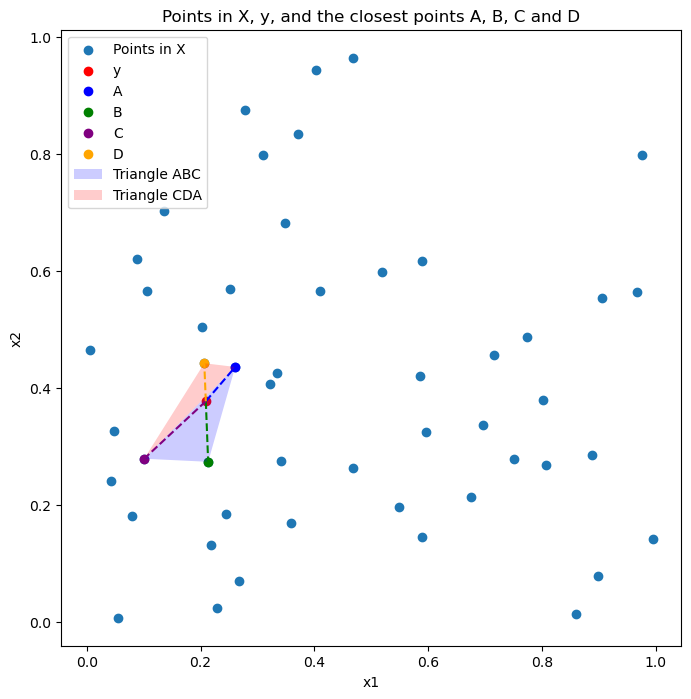

In [12]:
# Distance function
# Setting up one generelized function to later only change the s.t. condition
# The function calculates the euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Initialize original points as NaN. This way we can check if they have been updated and the calculation of A, B, C, D is possible.
A, B, C, D = (np.nan, np.nan), (np.nan, np.nan), (np.nan, np.nan), (np.nan, np.nan)
# Initialize minimum distances as infinity to ensure that the first distance will be smaller than the initial value.
min_dist_A = min_dist_B = min_dist_C = min_dist_D = np.inf

# Find A, B, C, D
# Loop through all points in X and find the closest point to y in each of the point equations.
for x in X:
    if x[0] > y[0] and x[1] > y[1]:
        dist = euclidean_distance(x, y)
        if dist < min_dist_A:
            A, min_dist_A = x, dist
    elif x[0] > y[0] and x[1] < y[1]:
        dist = euclidean_distance(x, y)
        if dist < min_dist_B:
            B, min_dist_B = x, dist
    elif x[0] < y[0] and x[1] < y[1]:
        dist = euclidean_distance(x, y)
        if dist < min_dist_C:
            C, min_dist_C = x, dist
    elif x[0] < y[0] and x[1] > y[1]:
        dist = euclidean_distance(x, y)
        if dist < min_dist_D:
            D, min_dist_D = x, dist

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], label='Points in X')
plt.scatter(y[0], y[1], color='red', label='y')
if not np.isnan(A).any():
    plt.scatter(A[0], A[1], color='blue', label='A')
    plt.plot([y[0], A[0]], [y[1], A[1]], color='blue', linestyle='--')
if not np.isnan(B).any():
    plt.scatter(B[0], B[1], color='green', label='B')
    plt.plot([y[0], B[0]], [y[1], B[1]], color='green', linestyle='--')
if not np.isnan(C).any():
    plt.scatter(C[0], C[1], color='purple', label='C')
    plt.plot([y[0], C[0]], [y[1], C[1]], color='purple', linestyle='--')
if not np.isnan(D).any():
    plt.scatter(D[0], D[1], color='orange', label='D')
    plt.plot([y[0], D[0]], [y[1], D[1]], color='orange', linestyle='--')

# Drawing triangles if possible and A, B, C, D are not NaN
if not (np.isnan(A).any() or np.isnan(B).any() or np.isnan(C).any()):
    plt.fill([A[0], B[0], C[0]], [A[1], B[1], C[1]], 'b', alpha=0.2, label='Triangle ABC')
if not (np.isnan(C).any() or np.isnan(D).any() or np.isnan(A).any()):
    plt.fill([C[0], D[0], A[0]], [C[1], D[1], A[1]], 'r', alpha=0.2, label='Triangle CDA')

plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Points in X, y, and the closest points A, B, C and D')
plt.show()


**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

To clarify the approach, let's closely examine the relevant functions first.

For a triangle $ABC$, the barycentric coordinates $(r_1^{ABC}, r_2^{ABC}, r_3^{ABC})$ are calculated as follows:


\begin{align*}
  r_1^{ABC} &= \frac{(B_2 - C_2)(y_1 - C_1) + (C_1 - B_1)(y_2 - C_2)}{(B_2 - C_2)(A_1 - C_1) + (C_1 - B_1)(A_2 - C_2)} \\
  r_2^{ABC} &= \frac{(C_2 - A_2)(y_1 - C_1) + (A_1 - C_1)(y_2 - C_2)}{(B_2 - C_2)(A_1 - C_1) + (C_1 - B_1)(A_2 - C_2)} \\
  r_3^{ABC} &= 1 - r_1^{ABC} - r_2^{ABC}
\end{align*}


This function computes the barycentric coordinates $(r_1^{ABC}, r_2^{ABC}, r_3^{ABC})$ for a $y$ inside triangle $ABC$. Here, $A$, $B$, and $C$ represent the corners of the triangle, with coordinates $(A_1, A_2)$, $(B_1, B_2)$, and $(C_1, C_2)$, where the first and second indices correspond to the x-axis and y-axis coordinates.

Similarly, for triangle $CDA$, the formula is:


\begin{align*}
  r_1^{CDA} &= \frac{(D_2 - A_2)(y_1 - A_1) + (A_1 - D_1)(y_2 - A_2)}{(D_2 - A_2)(C_1 - A_1) + (A_1 - D_1)(C_2 - A_2)} \\
  r_2^{CDA} &= \frac{(A_2 - C_2)(y_1 - A_1) + (C_1 - A_1)(y_2 - A_2)}{(D_2 - A_2)(C_1 - A_1) + (A_1 - D_1)(C_2 - A_2)} \\
  r_3^{CDA} &= 1 - r_1^{CDA} - r_2^{CDA}
\end{align*}


In this task, we will apply the above functions to the previously calculated triangles. The barycentric coordinates are calculated for both triangles. We then apply conditions to determine in which triangle point $y$ is located.

If $ r_1^{ABC} \in [0, 1] $, $ r_2^{ABC} \in [0, 1] $, and $ r_3^{ABC} \in [0, 1] $, then the point is inside triangle $ABC$. If $ r_1^{CDA} \in [0, 1] $, $ r_2^{CDA} \in [0, 1] $, and $ r_3^{CDA} \in [0, 1] $, then point $y$ is inside triangle $CDA$. If none of these conditions hold, point $y$ is located outside both triangles.

This code works as followed:

- A function `barycentric_coordinates` is defined to compute the barycentric coordinates for a point relative to a triangle.
- Barycentric coordinates are computed for $y$ for the triangles $ABC$ and $CDA$.
- The code checks if $y$ is inside triangle $ABC$, $CDA$ or outside of these with the above displayed conditions




In [13]:
# Function to compute barycentric coordinates
# Considerer that we only use one function for both triangles as the setup is the same.
def barycentric_coordinates(y, A, B, C):
    denom = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denom
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denom
    r3 = 1 - r1 - r2
    return r1, r2, r3


# Compute barycentric coordinates for triangle ABC
r_ABC1, r_ABC2, r_ABC3 = barycentric_coordinates(y, A, B, C)
# Compute barycentric coordinates for triangle CDA
r_CDA1, r_CDA2, r_CDA3 = barycentric_coordinates(y, C, D, A)

# Check if y is inside the triangle ABC
inside_ABC = (0 <= r_ABC1 <= 1) and (0 <= r_ABC2 <= 1) and (0 <= r_ABC3 <= 1)
# Check if y is inside the triangle CDA
inside_CDA = (0 <= r_CDA1 <= 1) and (0 <= r_CDA2 <= 1) and (0 <= r_CDA3 <= 1)


if inside_ABC:
    
    print("The barycentric coordinate is (r1ABC, r2ABC, r3ABC) = ", r_ABC1, r_ABC2, r_ABC3)
    print("The point y is inside triangle ABC")

elif inside_CDA:
    
    print("The barycentric coordinate is (r1CDA, r2CDA, r3CDA) = ", r_CDA1, r_CDA2, r_CDA3)
    print("The point y is inside triangle CDA")
    
else:
    result = np.nan
    print("The point y is outside both triangles ABC and CDA")





The barycentric coordinate is (r1ABC, r2ABC, r3ABC) =  0.6286263152916166 0.06910145494351515 0.3022722297648682
The point y is inside triangle ABC


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [14]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

The approximation of $f(y)$ is calcualted by 
$$
f(y)_{approx} = r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)
$$ 
if $y$ is in triangle $ABC$ or by 
$$f_{approx}(y) = r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)
$$ 
if $y$ is in triangle $CDA$. We use the in question 2 calculated barycentric coordinates.

Further, we calculate the true value of $y$ which we define as 
$$
f_{true}(y_1,y_2) = y_1 \cdot y_2
$$
This reuslt is used to calculate the absolute interpolation error to get a feeling on the percision of the barycentric interpolation. the error is defined as
$$
error = |f_{true}(y)-f_{approx}(y)|
$$

The next cell displays the entire algorithm, including all definitions and functions. It can be split into two parts. 
- Part 1 includes the unaltered code from questions 1 and 2. 
- Part 2 contains an if-loop to calculate the appropriate $f_{approx}(y)$ depending on the location of $y$ as well as the calculation of $f_{true}(y)$ and the $error$.




In [15]:
#Part 1

# Distance function
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Initialize original points as NaN
A, B, C, D = (np.nan, np.nan), (np.nan, np.nan), (np.nan, np.nan), (np.nan, np.nan)
min_dist_A = min_dist_B = min_dist_C = min_dist_D = np.inf

# Find A, B, C, D
for x in X:
    if x[0] > y[0] and x[1] > y[1]:
        dist = euclidean_distance(x, y)
        if dist < min_dist_A:
            A, min_dist_A = x, dist
    elif x[0] > y[0] and x[1] < y[1]:
        dist = euclidean_distance(x, y)
        if dist < min_dist_B:
            B, min_dist_B = x, dist
    elif x[0] < y[0] and x[1] < y[1]:
        dist = euclidean_distance(x, y)
        if dist < min_dist_C:
            C, min_dist_C = x, dist
    elif x[0] < y[0] and x[1] > y[1]:
        dist = euclidean_distance(x, y)
        if dist < min_dist_D:
            D, min_dist_D = x, dist


# Function to compute barycentric coordinates
def barycentric_coordinates(y, A, B, C):
    denom = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denom
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denom
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Compute barycentric coordinates for triangle ABC
r_ABC1, r_ABC2, r_ABC3 = barycentric_coordinates(y, A, B, C)
# Compute barycentric coordinates for triangle CDA
r_CDA1, r_CDA2, r_CDA3 = barycentric_coordinates(y, C, D, A)

# Check if y is inside the triangle ABC
inside_ABC = (0 <= r_ABC1 <= 1) and (0 <= r_ABC2 <= 1) and (0 <= r_ABC3 <= 1)
# Check if y is inside the triangle CDA
inside_CDA = (0 <= r_CDA1 <= 1) and (0 <= r_CDA2 <= 1) and (0 <= r_CDA3 <= 1)



#Part 2


# Extensions of current algorithm to calculate f(y) using barycentric coordinates
# Calculate f(y) using barycentric coordinates
if inside_ABC:
    print("The barycentric coordinate is (r1ABC, r2ABC, r3ABC) = ", r_ABC1, r_ABC2, r_ABC3)
    print("The point y is inside triangle ABC")
    f_y_approx = r_ABC1 * f(A) + r_ABC2 * f(B) + r_ABC3 * f(C)
    print(f"Approximation of f(y) using triangle points and barycentric coordiante is: {f_y_approx}")
elif inside_CDA:
    print("The barycentric coordinate is (r1CDA, r2CDA, r3CDA) = ", r_CDA1, r_CDA2, r_CDA3)
    print("The point y is inside triangle CDA")
    f_y_approx = r_CDA1 * f(C) + r_CDA2 * f(D) + r_CDA3 * f(A)
    print(f"Approximation of f(y) using triangle points and barycentric coordiante is: {f_y_approx}")
else:
    f_y_approx = np.nan
    print("The point y is outside both triangles ABC and CDA")

# Compute the true value of f(y)
f_y_true = f(y)

# Output the results
print(f"True value of f(y) is: {f_y_true}")
print(f"The absolute interpolation error is: {abs(f_y_true - f_y_approx)}")


The barycentric coordinate is (r1ABC, r2ABC, r3ABC) =  0.6286263152916166 0.06910145494351515 0.3022722297648682
The point y is inside triangle ABC
Approximation of f(y) using triangle points and barycentric coordiante is: 0.08405201731052576
True value of f(y) is: 0.0789565216259594
The absolute interpolation error is: 0.005095495684566367


**Question 4:** Repeat question 3 for all points in the set $Y$.

We extend the code from question 3 by iterating the algorithm over each point in the set $Y$. Additionally, we modify the print statements. The code produces different statements based on whether the points are inside or outside the triangles.

In [16]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [17]:
# Process each point in Y
results = []
for y in Y:
    # Initialize original points as NaN
    A, B, C, D = (np.nan, np.nan), (np.nan, np.nan), (np.nan, np.nan), (np.nan, np.nan)
    min_dist_A = min_dist_B = min_dist_C = min_dist_D = np.inf

    # Find A, B, C, D
    for x in X:
        if x[0] > y[0] and x[1] > y[1]:
            dist = np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)
            if dist < min_dist_A:
                A, min_dist_A = x, dist
        elif x[0] > y[0] and x[1] < y[1]:
            dist = np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)
            if dist < min_dist_B:
                B, min_dist_B = x, dist
        elif x[0] < y[0] and x[1] < y[1]:
            dist = np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)
            if dist < min_dist_C:
                C, min_dist_C = x, dist
        elif x[0] < y[0] and x[1] > y[1]:
            dist = np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)
            if dist < min_dist_D:
                D, min_dist_D = x, dist

    # Compute barycentric coordinates for triangle ABC
    r_ABC1, r_ABC2, r_ABC3 = barycentric_coordinates(y, A, B, C)
    # Compute barycentric coordinates for triangle CDA
    r_CDA1, r_CDA2, r_CDA3 = barycentric_coordinates(y, C, D, A)

    # Check if y is inside the triangle ABC
    inside_ABC = (0 <= r_ABC1 <= 1) and (0 <= r_ABC2 <= 1) and (0 <= r_ABC3 <= 1)
    # Check if y is inside the triangle CDA
    inside_CDA = (0 <= r_CDA1 <= 1) and (0 <= r_CDA2 <= 1) and (0 <= r_CDA3 <= 1)

    # Calculate f(y) using barycentric coordinates if inside ABC or CDA
    if inside_ABC:
        f_y_approx = r_ABC1 * f(A) + r_ABC2 * f(B) + r_ABC3 * f(C)
        f_y_true = f(y)
        results.append((y, f_y_true, f_y_approx, "ABC"))
    elif inside_CDA:
        f_y_approx = r_CDA1 * f(C) + r_CDA2 * f(D) + r_CDA3 * f(A)
        f_y_true = f(y)
        results.append((y, f_y_true, f_y_approx, "CDA"))
    else:
        print(f"The point {y} is outside the triangles ABC and CDA")
        print()

# Output the results for points inside ABC or CDA
for result in results:
    y, f_y_true, f_y_approx, triangle = result
    print(f"Point y: {y}")
    print(f"Triangle: {triangle}")
    print(f"True value of f(y): {f_y_true}")
    print(f"Approximation of f(y) using triangle points: {f_y_approx}")
    print(f"Absolute interpolation error: {abs(f_y_true - f_y_approx)}")
    print()

The point (0.8, 0.8) is outside the triangles ABC and CDA

Point y: (0.2, 0.2)
Triangle: ABC
True value of f(y): 0.04000000000000001
Approximation of f(y) using triangle points: 0.04032631372248057
Absolute interpolation error: 0.0003263137224805632

Point y: (0.8, 0.2)
Triangle: ABC
True value of f(y): 0.16000000000000003
Approximation of f(y) using triangle points: 0.15874233999349835
Absolute interpolation error: 0.0012576600065016819

Point y: (0.8, 0.2)
Triangle: ABC
True value of f(y): 0.16000000000000003
Approximation of f(y) using triangle points: 0.15874233999349835
Absolute interpolation error: 0.0012576600065016819

Point y: (0.5, 0.5)
Triangle: ABC
True value of f(y): 0.25
Approximation of f(y) using triangle points: 0.2512901561119622
Absolute interpolation error: 0.001290156111962204



Except for the point $(0.8, 0.8)$, all other points lie inside a triangle. For these points, we can employ the barycentric interpolation. Because the interpolation error is small, the method can be considered as accurate.